In [2]:
import pandas as pd
pd.read_csv("studentsuccess.csv")

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
import pandas as pd
data = pd.read_csv("studentsuccess.csv")  
attribute_info = data.info()
print(attribute_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

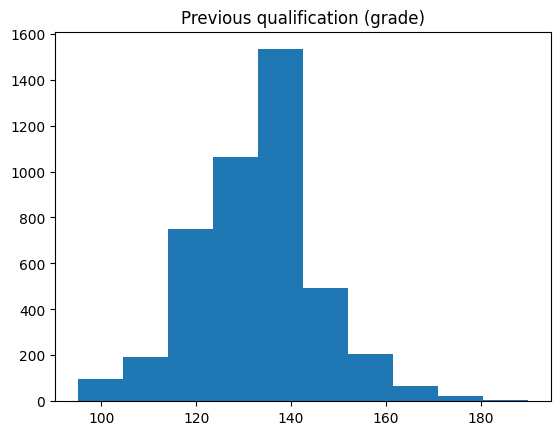

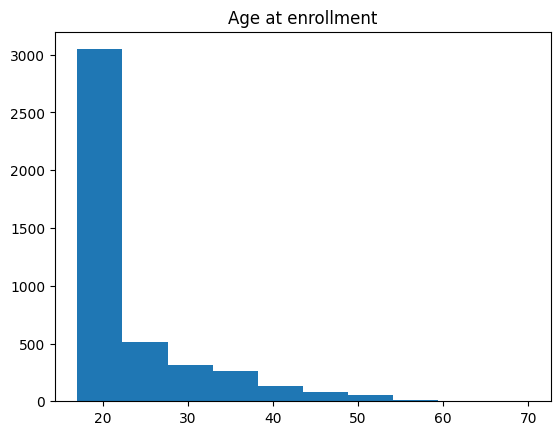

In [19]:
import matplotlib.pyplot as plt


plt.hist(data["Previous qualification (grade)"])
plt.title("Previous qualification (grade)")
plt.show()

plt.hist(data["Age at enrollment"])
plt.title("Age at enrollment")
plt.show()


# Feature Selection

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X = data.drop("Target", axis=1)
y = data["Target"]

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

k = 10 
selected_features = feature_importance_df.head(k)['Feature'].tolist()

print("Selected Features:", selected_features)


Selected Features: ['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Curricular units 2nd sem (evaluations)', 'Admission grade', 'Age at enrollment', 'Previous qualification (grade)', 'Course']


# Heatmap after Feature Selection

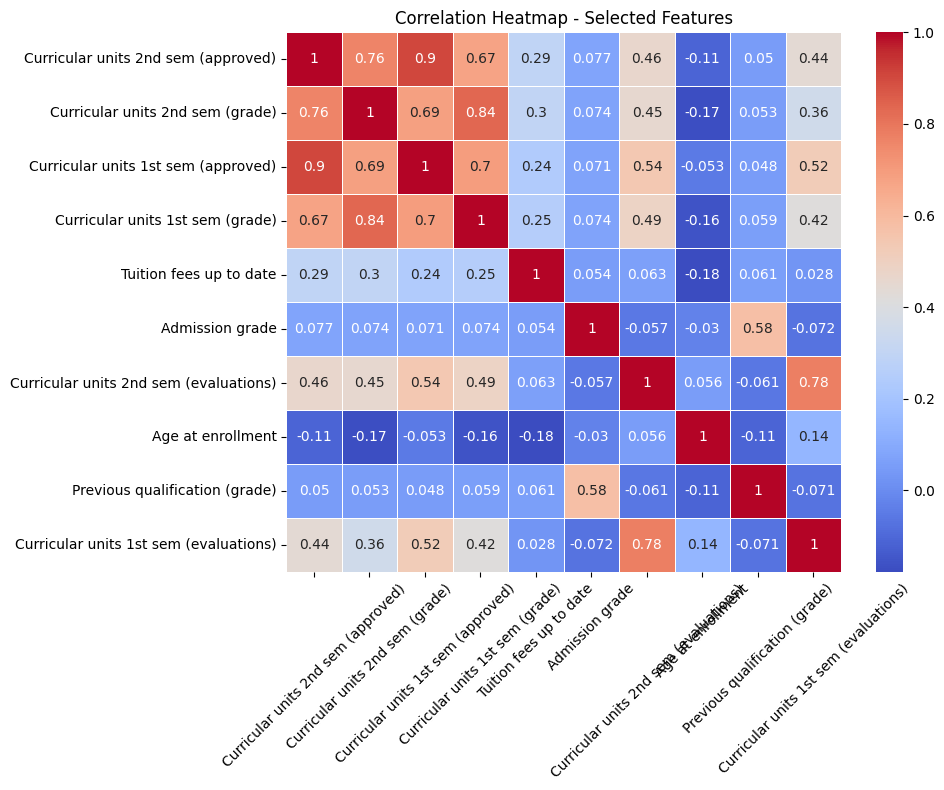

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Tuition fees up to date', 'Admission grade', 'Curricular units 2nd sem (evaluations)', 'Age at enrollment', 'Previous qualification (grade)', 'Curricular units 1st sem (evaluations)'] 
selected_df = df[selected_features]

corr_matrix = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap - Selected Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Gaussian Naive Bayes

Best Random State: 54
Training Accuracy: 0.7244789826916284
Test Accuracy: 0.7084745762711865
Classification Report (Test):
              precision    recall  f1-score   support

     Dropout       0.83      0.65      0.73       316
    Enrolled       0.44      0.18      0.25       151
    Graduate       0.69      0.94      0.79       418

    accuracy                           0.71       885
   macro avg       0.65      0.59      0.59       885
weighted avg       0.69      0.71      0.68       885



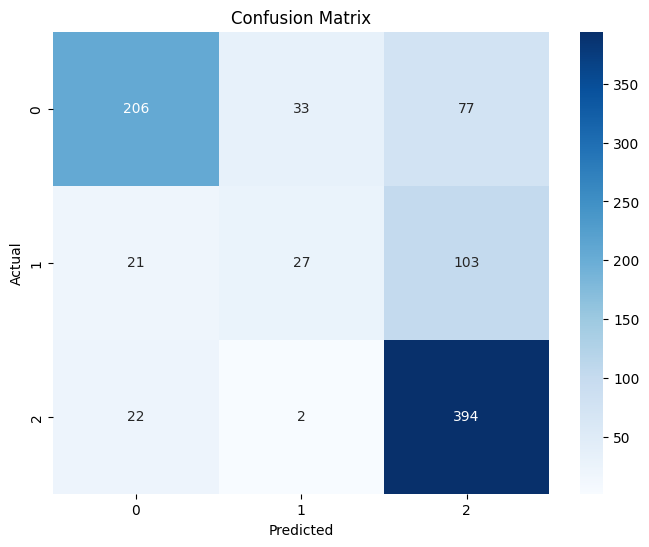

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random

X = data[selected_features]
y = data["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_random_state = None
best_accuracy = 0


for random_state in range(1, 101):
    classifier = GaussianNB()
    random.seed(random_state)
    X_train_sampled = X_train.sample(frac=0.8, random_state=random_state)
    y_train_sampled = y_train[X_train_sampled.index]
    classifier.fit(X_train_sampled, y_train_sampled)
    y_test_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state


classifier = GaussianNB()
random.seed(best_random_state)
X_train_sampled = X_train.sample(frac=0.8, random_state=best_random_state)
y_train_sampled = y_train[X_train_sampled.index]
classifier.fit(X_train_sampled, y_train_sampled)
y_train_pred = classifier.predict(X_train_sampled)
y_test_pred = classifier.predict(X_test)
train_accuracy = accuracy_score(y_train_sampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print("Best Random State:", best_random_state)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


classification_report_test = classification_report(y_test, y_test_pred)
print("Classification Report (Test):")
print(classification_report_test)

confusion_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM classifier

Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Training Accuracy: 0.7660356032777621
Testing Accuracy: 0.735593220338983
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.86      0.68      0.76       316
    Enrolled       0.46      0.33      0.39       151
    Graduate       0.73      0.92      0.82       418

    accuracy                           0.74       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.73      0.74      0.72       885



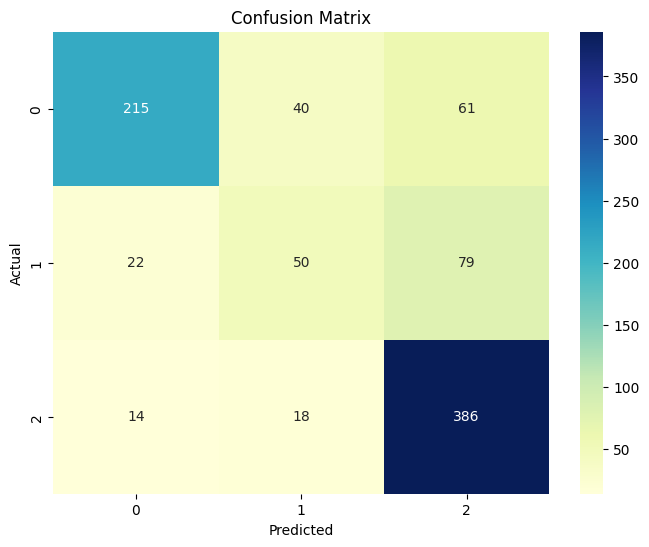

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = data[selected_features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10]
}

svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


y_train_pred = best_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print('Training Accuracy:', train_accuracy)


y_test_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Testing Accuracy:', test_accuracy)


classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)


confusion_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# Random Forest Classifier

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
Training Accuracy: 0.8728454365640012
Testing Accuracy: 0.7412429378531074
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.84      0.73      0.78       316
    Enrolled       0.45      0.28      0.34       151
    Graduate       0.74      0.92      0.82       418

    accuracy                           0.74       885
   macro avg       0.68      0.64      0.65       885
weighted avg       0.73      0.74      0.72       885

Confusion Matrix:
[[230  28  58]
 [ 35  42  74]
 [ 10  24 384]]


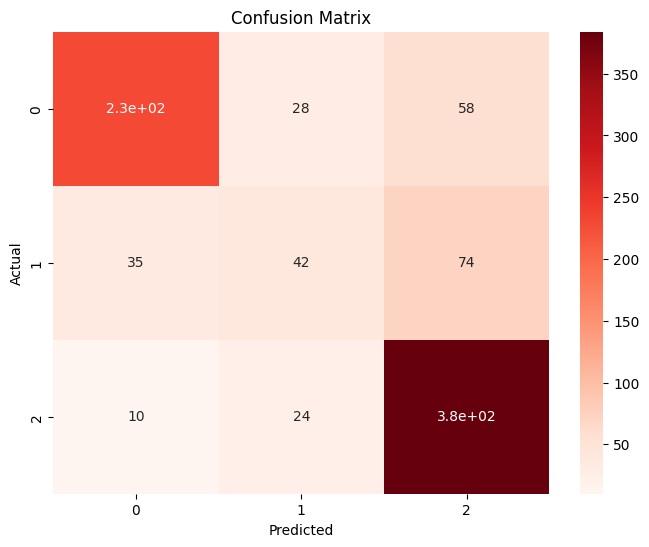

In [18]:
from sklearn.ensemble import RandomForestClassifier

X = data[selected_features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

y_train_pred = best_rf.predict(X_train)

y_test_pred = best_rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)


confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# K Nearest Neighbour

Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Training Accuracy: 0.795422435716304
Testing Accuracy: 0.7197740112994351
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.81      0.71      0.75       316
    Enrolled       0.39      0.25      0.30       151
    Graduate       0.73      0.90      0.81       418

    accuracy                           0.72       885
   macro avg       0.64      0.62      0.62       885
weighted avg       0.70      0.72      0.70       885

Confusion Matrix:
[[223  33  60]
 [ 36  37  78]
 [ 16  25 377]]


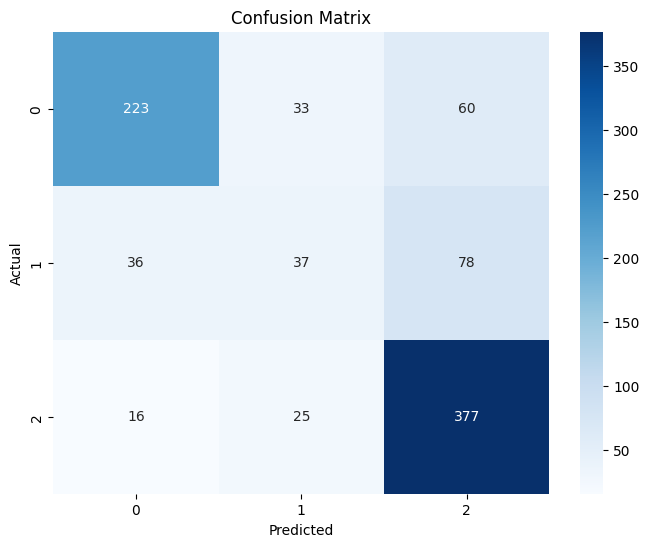

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = data[selected_features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

y_train_pred = best_knn.predict(X_train)

y_test_pred = best_knn.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', train_accuracy)
print('Testing Accuracy:', test_accuracy)


classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)


confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Logistic Regression

Training Accuracy: 0.734670810963549
Testing Accuracy: 0.7175141242937854
Classification Report:
              precision    recall  f1-score   support

     Dropout       0.78      0.73      0.75       316
    Enrolled       0.41      0.21      0.27       151
    Graduate       0.73      0.89      0.80       418

    accuracy                           0.72       885
   macro avg       0.64      0.61      0.61       885
weighted avg       0.69      0.72      0.69       885

Confusion Matrix:
[[232  23  61]
 [ 42  31  78]
 [ 25  21 372]]


C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


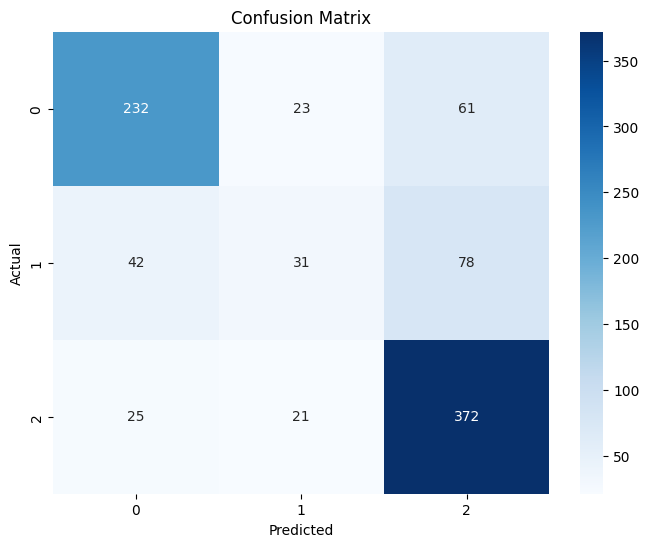

In [9]:
from sklearn.linear_model import LogisticRegression

X = data[selected_features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)


classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:")
print(classification_rep)

confusion_mat = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(confusion_mat)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


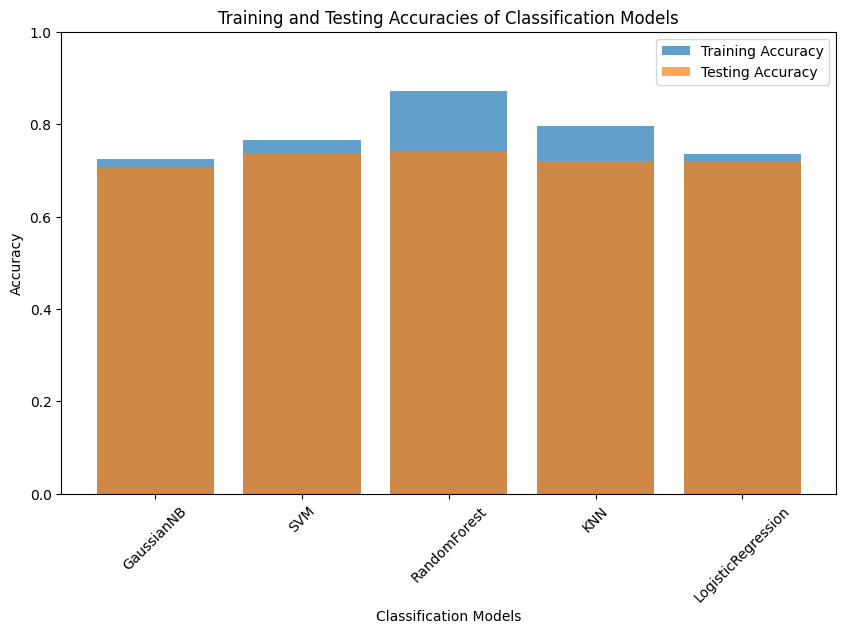

In [10]:
import matplotlib.pyplot as plt


training_accuracies = [0.7244789826916284, 0.7660356032777621, 0.8728454365640012, 0.795422435716304, 0.734670810963549]
testing_accuracies = [0.7084745762711865, 0.735593220338983, 0.7412429378531074, 0.7197740112994351, 0.7175141242937854]


model_names = ['GaussianNB', 'SVM', 'RandomForest', 'KNN', 'LogisticRegression']


plt.figure(figsize=(10, 6))
plt.bar(model_names, training_accuracies, label='Training Accuracy', alpha=0.7)
plt.bar(model_names, testing_accuracies, label='Testing Accuracy', alpha=0.7)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies of Classification Models')
plt.legend()
plt.xticks(rotation=45)
plt.ylim([0.0, 1.0])
plt.show()


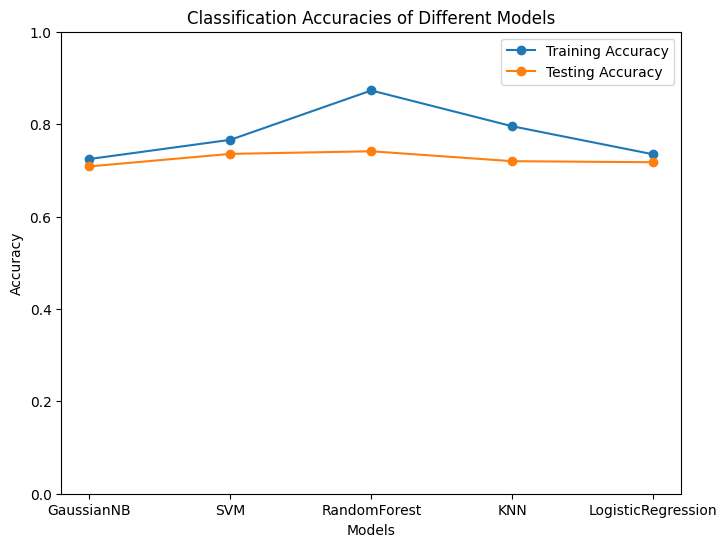

In [14]:
import matplotlib.pyplot as plt


models = ['GaussianNB', 'SVM', 'RandomForest', 'KNN', 'LogisticRegression']
training_acc = [0.7244789826916284, 0.7660356032777621, 0.8728454365640012, 0.795422435716304, 0.734670810963549]
testing_acc = [0.7084745762711865, 0.735593220338983, 0.7412429378531074, 0.7197740112994351, 0.7175141242937854]


plt.figure(figsize=(8, 6))
plt.plot(models, training_acc, marker='o', label='Training Accuracy')
plt.plot(models, testing_acc, marker='o', label='Testing Accuracy')


plt.title('Classification Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

plt.show()
